In [1]:
import gradio as gr

In [3]:
def hello_world(name):
    return "Hello..." + name + "!!"

In [4]:
hello_world("Suraj")

'Hello...Suraj!!'

In [8]:
interface = gr.Interface(fn=hello_world, inputs='text', outputs="text")

In [9]:
interface.launch()

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x7fcbbd46a6a0>,
 'http://127.0.0.1:7860/',
 None)

In [10]:
interface = gr.Interface(fn=hello_world,
                         inputs=gr.inputs.Textbox(lines=5, placeholder="Enter your input here.."),
                         outputs="text")
interface.launch()

Running on local URL:  http://127.0.0.1:7861/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x7fcbbd46a6a0>,
 'http://127.0.0.1:7861/',
 None)

### Image Webapp

In [11]:
import gradio as gr
import numpy as np

In [12]:
def sepia(input_img):
    sepia_filter = np.array([[.393, .769, .189],
                             [.349, .686, .168],
                             [.272, .534, .131]])
    sepia_img = input_img.dot(sepia_filter.T)
    sepia_img /= sepia_img.max()
    return sepia_img

In [13]:
iface = gr.Interface(sepia, gr.inputs.Image(shape=(200, 200)), "image")
iface.launch()

Running on local URL:  http://127.0.0.1:7862/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x7fcbbd46a6a0>,
 'http://127.0.0.1:7862/',
 None)

### Tabular Data Webapp

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def sales_projections(employee_data):
    sales_data = employee_data.iloc[:, 1:4].astype("int").to_numpy()
    regression_values = np.apply_along_axis(lambda row: np.array(np.poly1d(np.polyfit([0,1,2], row, 2))), 0, sales_data)
    
    projected_months = np.repeat(np.expand_dims(np.arange(3, 12), 0), len(sales_data), axis=0)
    
    projected_values = np.array([month * month * regression[0] + month * regression[1] + regression[2] for month, regression in zip(projected_months, regression_values)])
    
    plt.plot(projected_values.T)
    plt.legend(employee_data["Name"])
    return employee_data, plt.gcf(), regression_values

Running on local URL:  http://127.0.0.1:7866/
Running on public URL: https://12047.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7fcbbd46a6a0>,
 'http://127.0.0.1:7866/',
 'https://12047.gradio.app')

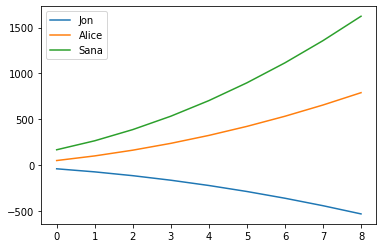

In [22]:
iface = gr.Interface(sales_projections,
                     gr.inputs.Dataframe(
                         headers=["Name", "Jan Sales", "Feb Sales", "Mar Sales"],
                         default=[["Jon", 12, 14, 18], ["Alice", 14, 17, 2], ["Sana", 8, 9.5, 12]]
                     ),
                     [
                         "dataframe",
                         "plot",
                         "numpy"
                     ],
                     description="Enter sales figures for employees to predict sales trajectory over year."
                    )
iface.launch(share=True)

### Multiple Inputs

In [52]:
import gradio as gr

def bmi(name, height, weight, feeling):
    bmi_val = round(weight / (height**2), 2)
    result = "Good" if bmi_val < 25 else "Bad"
    if feeling:
        txt="Happy"
    else:
        txt="Sad"
    return("Hello {}. Your BMI is {}".format(name, bmi_val), result, txt)

In [41]:
bmi("Suraj", 1.72, 70)

('Hello Suraj. Your BMI is 23.66', 'Good')

In [53]:
interface = gr.Interface(
    fn=bmi,
    inputs=["text", gr.inputs.Slider(0, 2, label="Height in Meters"), gr.inputs.Slider(0, 100, label="Weight in Kg"),
           gr.inputs.Checkbox("Your Feeling Today")],
    outputs=["text", "text", "text"]).launch()

# For debugging
# launch(debug=True)

Running on local URL:  http://127.0.0.1:7877/

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.


Traceback (most recent call last):
  File "/home/sp/anaconda3/envs/py39/lib/python3.9/site-packages/gradio/app.py", line 199, in predict
    prediction, durations = await run_in_threadpool(
  File "/home/sp/anaconda3/envs/py39/lib/python3.9/site-packages/starlette/concurrency.py", line 39, in run_in_threadpool
    return await anyio.to_thread.run_sync(func, *args)
  File "/home/sp/anaconda3/envs/py39/lib/python3.9/site-packages/anyio/to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "/home/sp/anaconda3/envs/py39/lib/python3.9/site-packages/anyio/_backends/_asyncio.py", line 818, in run_sync_in_worker_thread
    return await future
  File "/home/sp/anaconda3/envs/py39/lib/python3.9/site-packages/anyio/_backends/_asyncio.py", line 754, in run
    result = context.run(func, *args)
  File "/home/sp/anaconda3/envs/py39/lib/python3.9/site-packages/gradio/interface.py", line 526, in process
    processed_

### Debugging